In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from IPython.display import display, HTML, display_html

In [2]:
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [3]:
X = pd.read_csv('train.csv')
X.drop('Id', axis = 1, inplace=True)

In [4]:
def null_values(df):
    null = df.isnull().sum()
    null_items = null[null>0]
    null_values_perc = null_items/df.shape[0]
    null_perc = null_values_perc[null_values_perc > 0].sort_values(ascending=False)
    null_names = [item for item in (null_items/df.shape[0]).sort_values(ascending = False).index]
    display(null_perc)

null_values(X)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

## Features Exceeding 50% Null Values

Four Features have Null values exceeding 50%
    
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
       
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
       
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
       
Lets investigate each feature.

In [5]:
df1 = pd.DataFrame(X['Alley'].value_counts(dropna=False))
df2 = pd.DataFrame(X['Fence'].value_counts(dropna=False))
df3 = pd.DataFrame(X['PoolQC'].value_counts(dropna=False))
df4 = pd.DataFrame(X['MiscFeature'].value_counts(dropna=False))
                   
display_side_by_side(df1, df2, df3, df4)

,Alley
NaN,1369
Grvl,50
Pave,41
,Fence
NaN,1179
MnPrv,157
GdPrv,59
GdWo,54
MnWw,11
,PoolQC


It looks like the data that is missing is likely to be the "NA" values that has been parsed incorrectly into NaN or something similar. We'll fill NaN values with "NV"

In [6]:
for item in ['Alley', 'Fence', 'PoolQC', 'MiscFeature']:
    X.loc[:,item].fillna('NV', inplace=True)

## Initial Ordinal Encoding

Now is a good time to use ordinal encoding to change the string values to numerical values.

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
       
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

We'll assume that the NA is similar to the previous situations and use ordinary encoding
       
We'll use an ascending scale from "0: No Value" to "4/5: Excellent".


In [7]:
X['Fence'].replace({'NV':0, 'MnPrv': 1, 'MnWw':1, 'GdPrv':2, 'GdWo':2}, inplace = True)
X['PoolQC'].replace({'NV':0, 'Fa':1, 'TA': 2, 'Gd':3, 'Ex':4}, inplace=True)
X.loc[:,'FireplaceQu'].fillna('NV', inplace=True)
X['FireplaceQu'].replace({'NV':0, 'Po':1, 'Fa':2, 'TA': 3, 'Gd':4, 'Ex':5}, inplace=True)

In [8]:
null_values(X)

LotFrontage     0.177397
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageYrBlt     0.055479
GarageType      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

## Null Garage Features

All the garage features have a similar set of null values, indicating they relate to the same observations.


GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
       
GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
       
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
       
GarageYrBlt: Year garage was built

GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

Again we have the "NA" problem so we'll impute the missing values as 'NA' and use ordinal encoding on those it applies to

In [9]:
X.loc[:,'GarageYrBlt'].fillna(0,inplace =True)

X.loc[:,'GarageType'].fillna("NV", inplace=True) 

X.loc[:,'GarageCond'].fillna("NV", inplace=True) 
X.loc[:,'GarageCond'].replace({'NV':0, 'Po':1, 'Fa':2, 'TA': 3, 'Gd':4, 'Ex':5}, inplace=True)

X.loc[:,'GarageQual'].fillna("NV", inplace=True) 
X.loc[:,'GarageQual'].replace({'NV':0, 'Po':1, 'Fa':2, 'TA': 3, 'Gd':4, 'Ex':5}, inplace=True)

X.loc[:,'GarageFinish'].fillna("NV", inplace=True) 
X.loc[:,'GarageFinish'].replace({'NV':0, 'Unf':1, 'RFn':2, 'Fin': 3}, inplace=True)

In [10]:
null_values(X)

LotFrontage     0.177397
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

## Null Basement Features

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
        
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
        
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
                  
                  

In [11]:
for item in ['BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']:
    X.loc[:,item].fillna('NV', inplace = True)
    
X.loc[:,'BsmtFinType2'].replace({'NV':0, 'Unf':1, 'LwQ':2, 'BLQ':2, 'Rec':3, 'ALQ':3, 'GLQ':4}, inplace=True)

X.loc[:,'BsmtExposure'].replace({'NV':0, 'No':1, 'Mn':2, 'Av': 3, 'Gd':4}, inplace=True)

X.loc[:,'BsmtFinType1'].replace({'NV':0, 'Unf':1, 'LwQ':2, 'BLQ':2, 'Rec':3, 'ALQ':3, 'GLQ':4}, inplace=True)

X.loc[:,'BsmtCond'].replace({'NV':0, 'Po':1, 'Fa':2, 'TA': 3, 'Gd':4, 'Ex':5}, inplace=True)

X.loc[:,'BsmtQual'].replace({'NV':0, 'Po':35, 'Fa':75, 'TA': 85, 'Gd':95, 'Ex':150}, inplace=True) #Taken midpoint for height in inches. 'Ex' is assumed to be 100-200

In [12]:
null_values(X)

LotFrontage    0.177397
MasVnrArea     0.005479
MasVnrType     0.005479
Electrical     0.000685
dtype: float64

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone 
       
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

In [13]:
display_side_by_side(pd.DataFrame(X['MasVnrType'].value_counts(dropna=False)), pd.DataFrame(X['Electrical'].value_counts(dropna=False)))

,MasVnrType
None,864
BrkFace,445
Stone,128
BrkCmn,15
NaN,8
,Electrical
SBrkr,1334
FuseA,94
FuseF,27
FuseP,3


In [14]:
X.loc[:,'Electrical'].fillna('SBrkr', inplace=True)
X.loc[:,'Electrical'].replace({'FuseP':1, 'Mix':1 ,'FuseF':1, 'FuseA':2, 'SBrkr':3},inplace=True)
X.loc[:,'MasVnrType'].fillna('None', inplace=True)

Next is LotFrontage & MasVnrArea

LotFrontage: Linear feet of street connected to property

MasVnrArea: Masonry veneer area in square feet

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([205., 643., 298.,  40.,   9.,   4.,   0.,   0.,   0.,   2.]),
 array([ 21. ,  50.2,  79.4, 108.6, 137.8, 167. , 196.2, 225.4, 254.6,
        283.8, 313. ]),
 <a list of 10 Patch objects>)

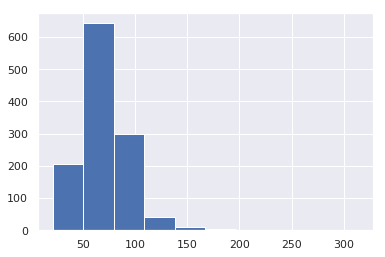

In [15]:
plt.hist(X['LotFrontage'].sort_values())

This data has large skew, so we'll impute using the median. (Will try and find some better means of imputing the data later)

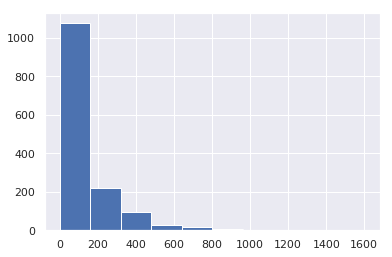

In [16]:
X['MasVnrArea'].hist() # Will fill with mode

In [17]:
X.loc[:,'LotFrontage'].fillna(X['LotFrontage'].median(), inplace=True)
X.loc[:,'MasVnrArea'].fillna(0, inplace=True) # MasVnrArea mode is 0

## Next We'll work on making the categorical data more accessible.

In [18]:
Categorical_X = X.select_dtypes(include=object)

In [19]:
Categorical_X.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional',
       'GarageType', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

First we'll examine the features with Cond, QC and Qual in the name.

HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
        
KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
        
Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
       
ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
 
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor 
 
 

In [20]:
X.loc[:'HeatingQC'].replace({'NV':0, 'Po':1, 'Fa':2, 'TA': 3, 'Gd':4, 'Ex':5}, inplace=True)  
X.loc[:'KitchenQual'].replace({'NV':0, 'Po':1, 'Fa':2, 'TA': 3, 'Gd':4, 'Ex':5}, inplace=True)
X.loc[:'Functional'].replace({'Sev':0, 'Sal':0, 'Maj1':1, 'Maj2':1,'Mod':2, 'Min1': 3, 'Min2': 3,'Typ':4}, inplace=True)
X.loc[:'ExterQual'].replace({'NV':0, 'Po':1, 'Fa':2, 'TA': 3, 'Gd':4, 'Ex':5}, inplace=True)
X.loc[:'ExterCond'].replace({'NV':0, 'Po':1, 'Fa':2, 'TA': 3, 'Gd':4, 'Ex':5}, inplace=True)

X.drop('MiscFeature', inplace = True, axis=1) # Due to the MiscValue feature will drop the feature column with the misc feature

## Next We'll look for features to turn into binary

In [21]:
binary_features = Categorical_X.nunique() <= 2
binary_features[binary_features]

Street        True
Utilities     True
CentralAir    True
dtype: bool

In [22]:
display_side_by_side(pd.DataFrame(X['Street'].value_counts()), pd.DataFrame(X['Utilities'].value_counts()), pd.DataFrame(X['CentralAir'].value_counts()))

,Street
Pave,1454
Grvl,6
,Utilities
AllPub,1459
NoSeWa,1
,CentralAir
Y,1365
N,95


In [23]:
X.loc[:'CentralAir'].replace({'Y':1, 'N':0},inplace=True)
X.drop('Utilities',axis=1,inplace=True)
X.drop('Street',axis=1,inplace=True)

In [24]:
Categorical_X = X.select_dtypes(include=object)
Categorical_X.columns

Index(['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'GarageType',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [25]:
binary = []
for item in Categorical_X.columns:
    if (X[item].value_counts()/X.shape[0]).iloc[0] > 0.85:
        binary.append((X[item].value_counts()/X.shape[0]).name)
dfs = []
for feature in binary:
    dfs.append(pd.DataFrame(X[feature].value_counts()))
    
display_side_by_side(dfs[0], dfs[1], dfs[2], dfs[3], dfs[4], dfs[5], dfs[6], dfs[7], dfs[8])    

,Alley
0,1369
Grvl,50
Pave,41
,LandContour
Lvl,1311
Bnk,63
HLS,50
Low,36
,LandSlope
Gtl,1382


In [26]:
X.loc[:,'Alley'].replace({'NV':0, 'Grvl':1, 'Pave':1},inplace=True)
X.loc[:,'LandContour'].replace({'Lvl':1, 'Bnk':0, 'HLS':0, 'Low':0},inplace=True)
X.loc[:,'LandSlope'].replace({'Sev':2, 'Mod':1, 'Gtl':0}, inplace = True)
X.loc[:'Condition1'].replace({'Norm':1, 'Feedr':0, 'Artery':0, 'PosN':0, 'RRNn':0, 'RRAe':0, 'RRAn':0, 'PosA':0, 'RRNe':0},inplace=True)
X.loc[:'Condition2'].replace({'Norm':1, 'Feedr':0, 'Artery':0, 'PosN':0, 'RRNn':0, 'RRAe':0, 'RRAn':0, 'PosA':0},inplace=True)
X.loc[:'RoofMatl'].replace({'Roll':0, 'Membran':0, 'ClyTile':0, 'Metal':0, 'WdShake':0, 'WdShngl':0, 'Tar&Grv':0,'CompShg':1, 0:0},inplace=True)
X.loc[:'Heating'].replace({'GasA':1, 'GasW':0, 'Grav':0, 'Wall':0, 'OthW':0, 'Floor':0},inplace=True)
X.loc[:'PavedDrive'].replace({'Y': 1, 'P': 1, 'N': 0}, inplace = True)
X.loc[:'SaleType'].replace({'Con':0, 'Oth':0, 'CWD': 0, 'ConLw':0, 'ConLI':0, 'ConLD':0,'COD':0, 'New':0, 'WD':1},inplace=True)

In [27]:
X.loc[:,'MSZoning'].replace({'RH':'RM'},inplace=True)
X.loc[:,'LotShape'].replace({'IR2':'IR1', 'IR3':'IR1'},inplace=True)
X.loc[:,'LotShape'].replace({'Reg':1, 'IR1':0},inplace=True)
X.loc[:,'LotConfig'].replace({'FR2':'Corner', 'FR3':'Corner'},inplace=True)
X.loc[:,'BldgType'].replace({'TwnhsE': 'TwnHouse', 'Twnhs':'TwnHouse', 'Duplex':'Double', '2fmCon':'Double'}, inplace=True)
X.loc[:,'HouseStyle'].replace({'2.5Unf':'2Story', '2.5Fin':'2Story', '1.5Fin':'1.5', '1.5Unf':'1.5', 'SLvl':'Split', 'SFoyer':'Split'},inplace=True)
X.loc[:,'RoofStyle'].replace({'Shed':'Other', 'Mansard':'Other', 'Gambrel':'Other', 'Flat':'Other', 'Hip':'Other'},inplace=True)
X.loc[:,'RoofStyle'].replace({'Other':0, 'Gable':1},inplace=True)
X.loc[:,'Exterior1st'].replace({'Brk Cmn':'Brk', 'BrkFace':'Brk', 'CBlock':'Other', 'AsphShng':'Other', 'Stone':'Other', 
                          'ImStucc':'Other', 'AsphShn':'Other', 'AsbShng':'Other', 'Wd Shng':'Other', 'Stucco':'Other', 
                          'Brk':'Other', 'CmentBd':'Other', 'BrkComm':'Other', 'WdShing':'Other', 'CemntBd':'Other'},inplace=True)
X.loc[:,'Exterior2nd'].replace({'Brk Cmn':'Brk', 'BrkFace':'Brk', 'CBlock':'Other', 'AsphShng':'Other', 'Stone':'Other', 
                          'ImStucc':'Other', 'AsphShn':'Other', 'AsbShng':'Other', 'Wd Shng':'Other', 'Stucco':'Other', 'Brk':'Other', 'CmentBd':'Other'}, inplace=True)
X.loc[:,'MasVnrType'].replace({'BrkFace':'Brk', 'BrkCmn':'Brk'},inplace=True)
X.loc[:,'Foundation'].replace({'Wood':'Other', 'Stone':'Other', 'Slab':'Other', 'BrkTil':'Other'},inplace = True)
X.loc[:,'GarageType'].replace({'CarPort':'Detchd', 'Basment':'Attchd', '2Types':'Attchd'},inplace=True)
X.loc[:,'SaleCondition'].replace({'AdjLand':'Other', 'Alloca':'Other', 'Family':'Other'},inplace = True)

In [28]:
Categorical_X = X.select_dtypes(include=object)
Categorical_X.columns
dummies = pd.get_dummies(Categorical_X)
X = pd.concat([X.drop(Categorical_X,axis=1), dummies],axis =1)

Text(0.5, 1.0, 'Correlation of Sale Price with each feature')

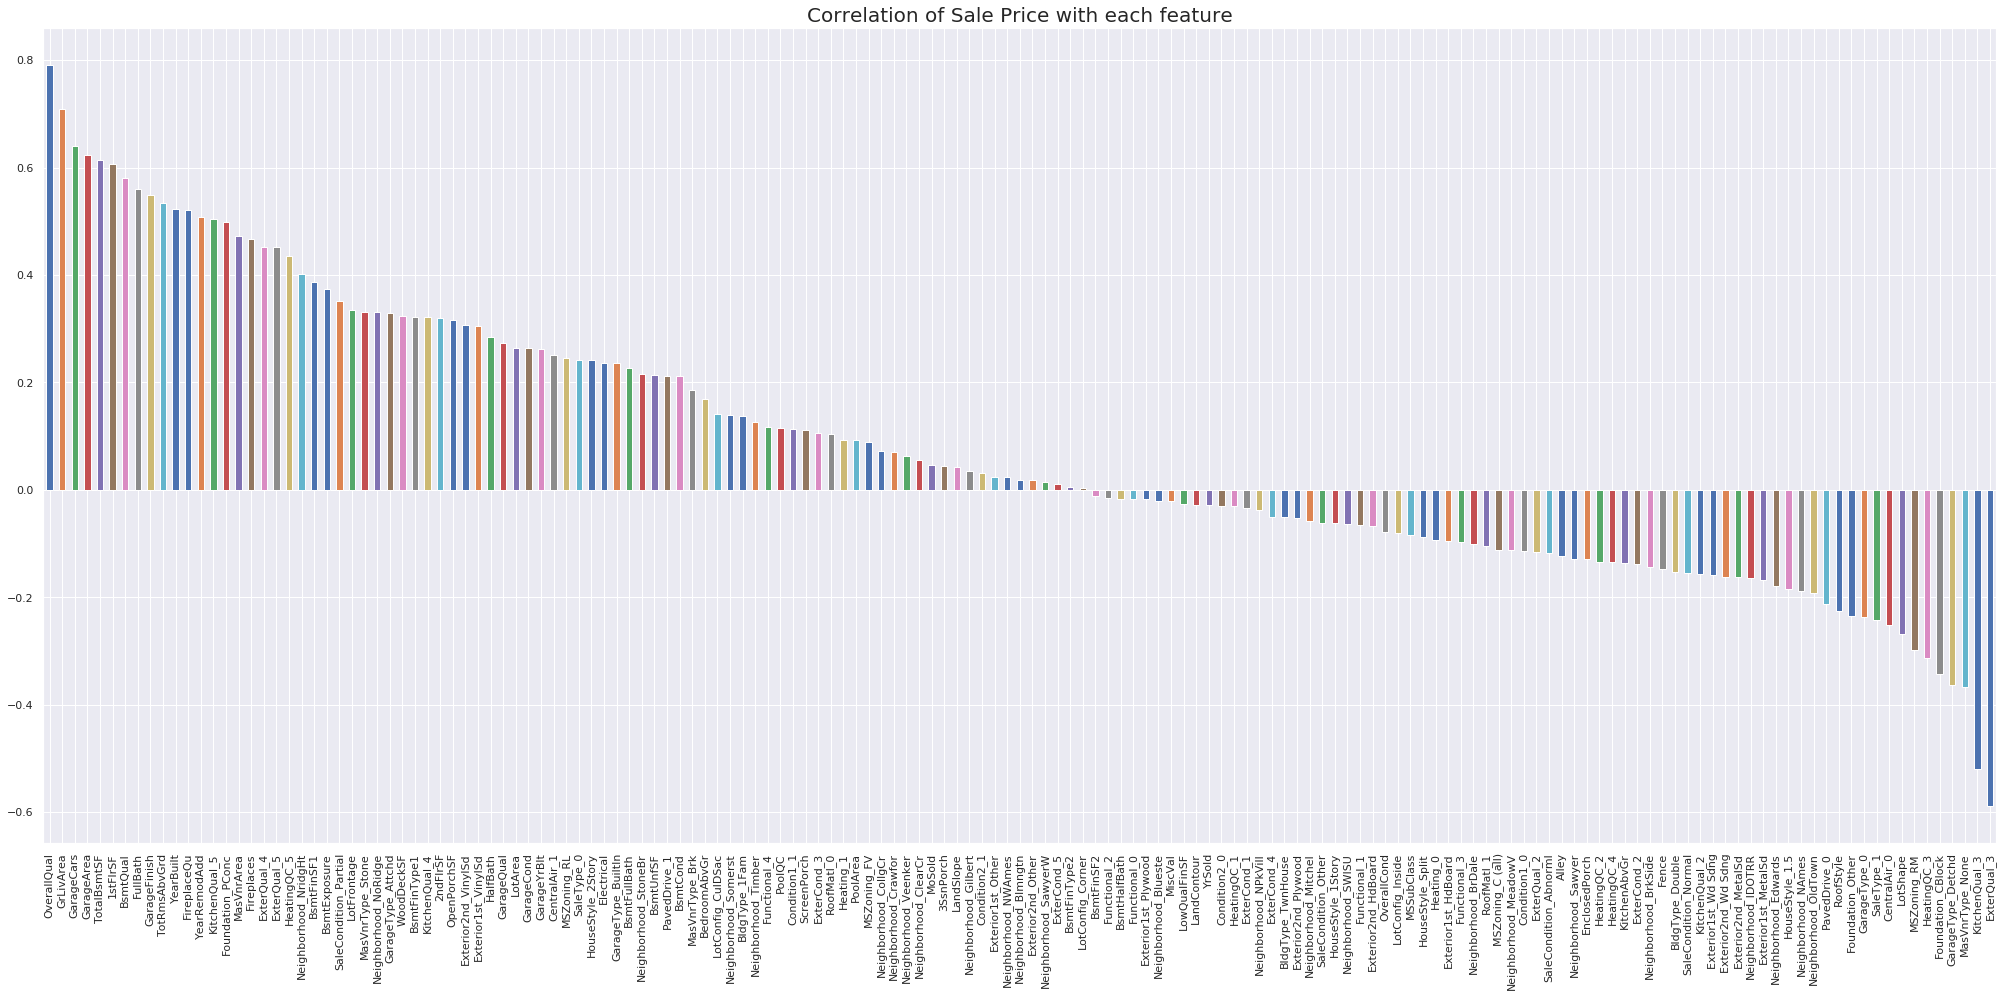

In [31]:
corr = X.corr()['SalePrice']
df = pd.DataFrame(corr)
df = df['SalePrice'].sort_values(ascending=False)
df.drop('SalePrice',inplace=True)
df.plot(kind = 'bar', figsize= (35,15))
plt.title('Correlation of Sale Price with each feature', fontsize=20)

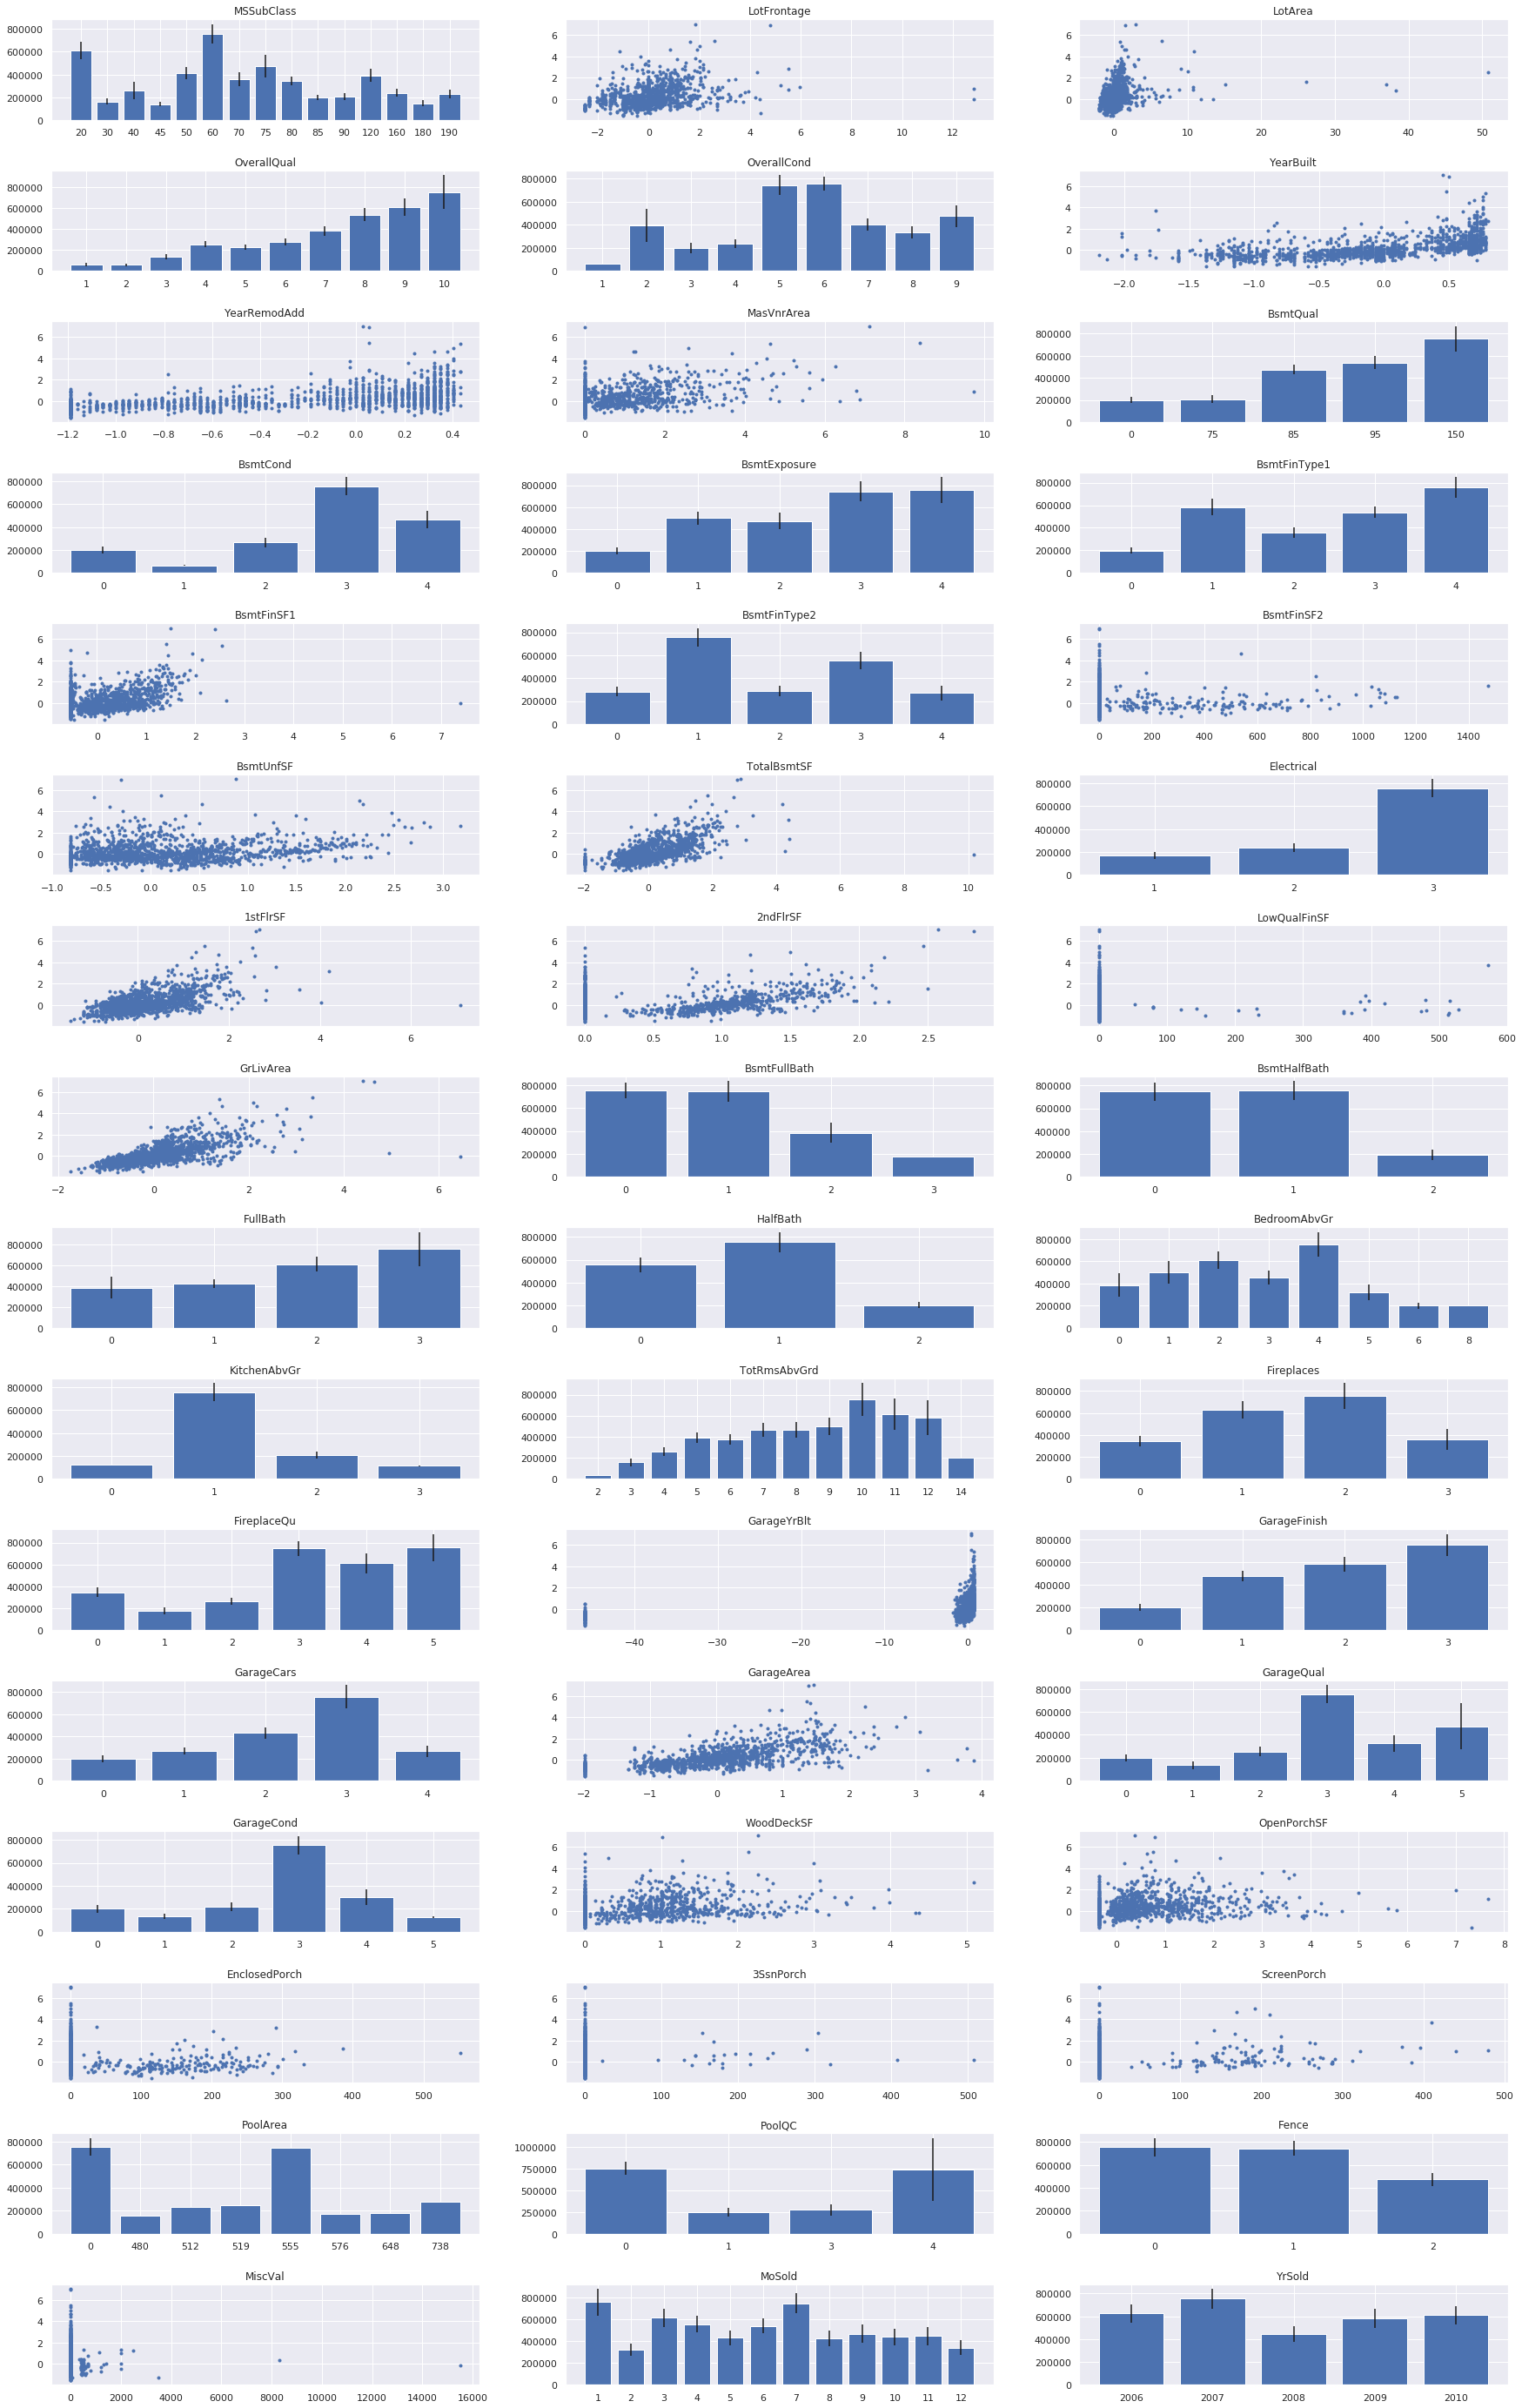

In [36]:
from sklearn.preprocessing import RobustScaler
RB = RobustScaler()
sale = X['SalePrice']
sale = RB.fit_transform(sale.values.reshape(-1,1))
sale = pd.Series(sale.tolist()).apply(lambda x: x[0])
Numerical_X = X.select_dtypes(include=[np.number])
Numerical_X.drop('SalePrice', axis=1, inplace=True)
for feature in Numerical_X.columns:
    if Numerical_X[feature].nunique() == 2:
        Numerical_X.drop(feature, axis=1, inplace=True)

plots = [item for item in Numerical_X.columns]
fig, axarr = plt.subplots(16, 3, figsize=(30,50)) 
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
for i in range(16):
    for j in range(3):
        plt.sca(axarr[i, j])
        s = X[plots[0]]
        if s.nunique() < 16:
            yerr= pd.DataFrame(X.groupby(plots[0])['SalePrice'].std())
            yerr.columns= ['Error']
            s = pd.DataFrame(X.groupby(plots[0])['SalePrice'].max())
            s = s.merge(pd.DataFrame(yerr), left_index = True, right_index= True)
            plt.bar(s.index.astype(str), s['SalePrice'], yerr= s['Error'])
            plt.title(plots[0])
            del plots[0]
        else:
            s = RB.fit_transform(s.values.reshape(-1,1))
            s = pd.Series(s.tolist()).apply(lambda x: x[0])
            plt.plot(s, sale, '.')
            plt.title(plots[0])
            del plots[0]

In [37]:
X.describe()

,MSSubClass,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,OverallQual,OverallCond,YearBuilt,...,GarageType_BuiltIn,GarageType_Detchd,PavedDrive_0,PavedDrive_1,SaleType_0,SaleType_1,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,0.062329,0.633562,0.897945,0.089041,6.099315,5.575342,1971.267808,...,0.060274,0.271233,0.061644,0.938356,0.132192,0.867808,0.069178,0.820548,0.024658,0.085616
std,42.300571,22.027677,9981.264932,0.241835,0.481996,0.302824,0.412638,1.382997,1.112799,30.202904,...,0.238075,0.444748,0.240590,0.240590,0.338815,0.338815,0.253844,0.383862,0.155132,0.279893
min,20.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1872.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7553.500000,0.000000,0.000000,1.000000,0.000000,5.000000,5.000000,1954.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,50.000000,69.000000,9478.500000,0.000000,1.000000,1.000000,0.000000,6.000000,5.000000,1973.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,70.000000,79.000000,11601.500000,0.000000,1.000000,1.000000,0.000000,7.000000,6.000000,2000.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,190.000000,313.000000,215245.000000,1.000000,1.000000,1.000000,2.000000,10.000000,9.000000,2010.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
